In [1]:
import numpy as np
import pandas as pd
from scipy import stats
#import math
import matplotlib.pyplot as plt

Ch07 P.14

In [2]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/gunfiring.csv")
mydata.head()

,Method,Physique,Rounds
0,M1,1,20.2
1,M1,2,22.0
2,M1,3,23.1
3,M1,1,26.2
4,M1,2,22.6


  Method  Physique     Rounds
0     M1         1  24.350000
1     M1         2  23.433333
2     M1         3  22.983333
3     M2         1  15.900000
4     M2         2  15.333333
5     M2         3  14.000000


Method
M1    AxesSubplot(0.125,0.125;0.775x0.755)
M2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rounds, dtype: object

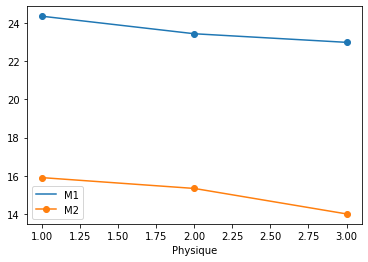

In [3]:
theta=mydata.groupby(['Method','Physique']).mean().reset_index()
print(theta)
t1=theta.set_index('Physique')
t1.groupby(['Method'])['Rounds'].plot(legend=True,marker='o')

In [4]:
mu=mydata.Rounds.mean()
yi_bar=mydata.groupby('Method').Rounds.mean().to_numpy()
yj_bar=mydata.groupby('Physique').Rounds.mean().to_numpy()

alpha=yi_bar-mu
beta=yj_bar-mu

I=alpha.shape[0]
J=beta.shape[0]
gamma=theta.Rounds.to_numpy().reshape(I,J)-np.add.outer(alpha,beta)-mu
print(mu)
print(yi_bar)
print(yj_bar)
print(alpha)
print(beta)
print(gamma)

19.333333333333332
[23.58888889 15.07777778]
[20.125      19.38333333 18.49166667]
[ 4.25555556 -4.25555556]
[ 0.79166667  0.05       -0.84166667]
[[-0.03055556 -0.20555556  0.23611111]
 [ 0.03055556  0.20555556 -0.23611111]]


P.19

In [5]:
yij=mydata.groupby(['Method','Physique']).Rounds.sum()
yi=mydata.groupby(['Method']).Rounds.sum()
yj=mydata.groupby(['Physique']).Rounds.sum()
yo=mydata.Rounds.sum()
I=yi.shape[0]
J=yj.shape[0]
n=mydata.shape[0]
r=n/I/J
print(yij)
print(yi)
print(yj)
print(yo)
print(I)
print(J)
print(r)

Method  Physique
M1      1           146.1
        2           140.6
        3           137.9
M2      1            95.4
        2            92.0
        3            84.0
Name: Rounds, dtype: float64
Method
M1    424.6
M2    271.4
Name: Rounds, dtype: float64
Physique
1    241.5
2    232.6
3    221.9
Name: Rounds, dtype: float64
696.0
2
3
6.0


In [6]:
cf=yo**2/I/J/r

ssa=sum(yi**2)/J/r-cf
ssb=sum(yj**2)/I/r-cf
ssab=sum(yij**2)/r-ssa-ssb-cf
sst=sum(mydata.Rounds**2)-cf
sstr=ssa+ssb+ssab
sse=sst-sstr

dfa=I-1
dfb=J-1
dfab=dfa*dfb
dftr=dfa+dfb+dfab
dft=n-1
dfe=dft-dftr

mstr=sstr/dftr
msa=ssa/dfa
msb=ssb/dfb
msab=ssab/dfab
mse=sse/dfe

ftr=mstr/mse
fa=msa/mse
fb=msb/mse
fab=msab/mse

print(sstr,ssa,ssb,ssab,sse,sst)
print(dftr,dfa,dfb,dfab,dfe,dft)
print(mstr,msa,msb,msab,mse)
print(ftr,fa,fb,fab)

669.1900000000005 651.9511111111133 16.05166666666628 1.187222222220953 91.56999999999971 760.7600000000002
5 1 2 2 30 35
133.8380000000001 651.9511111111133 8.02583333333314 0.5936111111104765 3.0523333333333236
43.84776673583069 213.59105966291864 2.629409195151195 0.19447781296619365


In [7]:
print(1-stats.f(dftr,dfe).cdf(ftr))
print(1-stats.f(dfa,dfe).cdf(fa))
print(1-stats.f(dfb,dfe).cdf(fb))
print(1-stats.f(dfab,dfe).cdf(fab))

6.639133687258436e-13
3.4416913763379853e-15
0.08867526843448714
0.8242941089483774


In [8]:
print(stats.f(dftr,dfe).ppf(.95))
print(stats.f(dfa,dfe).ppf(.95))
print(stats.f(dfb,dfe).ppf(.95))
print(stats.f(dfab,dfe).ppf(.95))

2.53355454755927
4.170876785766691
3.3158295010135217
3.3158295010135217


In [9]:
sse1=sse+ssab
dfe1=dfe+dfab
mse1=sse1/dfe1

fa1=msa/mse1
fb1=msb/mse1

print(sse1, dfe1, mse1)
print(fa1,fb1)

92.75722222222066 32 2.8986631944443957
224.91440618580617 2.7688050645951297


In [10]:
print(1-stats.f(dfa,dfe1).cdf(fa1))
print(1-stats.f(dfb,dfe1).cdf(fb1))

5.551115123125783e-16
0.07779178616943527


In [11]:
print(stats.f(dfa,dfe1).ppf(.95))
print(stats.f(dfb,dfe1).ppf(.95))

4.149097445699548
3.294536816491142


P.22

In [22]:
a=np.array([1/3,1/3,1/3,-1/3,-1/3,-1/3])
l=a @ theta.Rounds
sel=np.sqrt(mse*sum(a**2)/r)
print(l,sel)

8.511111111111111 0.5823642744435369


In [23]:
myt=stats.t(dfe).ppf(.975)
[l-myt*sel,l+myt*sel]

[7.3217645938812215, 9.700457628341]